# *Introduction to Regression with Neural Networks in TensorFLow*

There are many definitions for a regression problem but in our case,we're going to simply it:predicting a numerical varaiable based on some other combination of variable,even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
import numpy as np
tf.__version__ 

'2.16.1'

## Creating a data to view and Fit

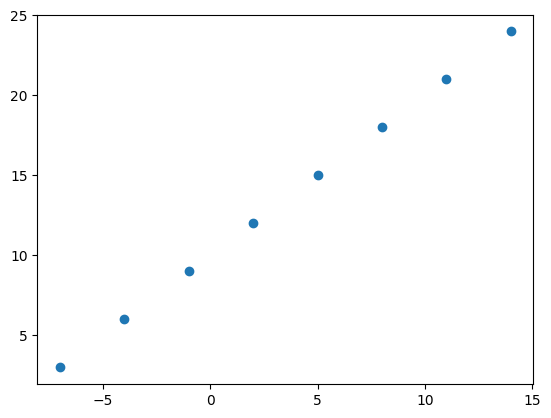

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
Y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,Y)

In [3]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
X[0],Y[0]

(-7.0, 3.0)

In [6]:
input_shape=X.shape
output_shape=Y.shape
input_shape,output_shape

((8,), (8,))

In [7]:
# Turn our NumPy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
Y=tf.cast(tf.constant(Y),dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape=X[0].shape
input_shape

TensorShape([])

## Steps in modeling with tensorflow

1. **Creating a model**-Define the input and Output layers,as well as the hidden layers of a deep learning model
2. **Compiling a model**-Define the loss function(in otherwords,which tells our model hwo wrong it is) and the optimiser (tells our model how to improve the patterns its learning)and evalution metrics(what we can use to interpret the performance of our model.)
3. **Fitting a model**-Letting the model try to find teh patterns between X and Y (features and labels)

In [9]:
# Set random seed 
tf.random.set_seed(42)

 # 1.Create a model using the Sequential API
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1)
  ])

  # 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # sgd is stochastic gradient descent
                  metrics=["mae"])   

  # 3.Fit  the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - loss: 9.9212 - mae: 9.9212
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.7887 - mae: 9.7887
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.6562 - mae: 9.6562
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.5237 - mae: 9.5237
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.3912 - mae: 9.3912


In [10]:
# Check the values of X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
type(17.0)

float

In [12]:
# Try and make a prediction using our model
import numpy as np
y_pred=model.predict(np.array([17.0]).reshape(-1,1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[20.407612]], dtype=float32)

In [13]:
y_pred+11

array([[31.407612]], dtype=float32)

## Improving our Model

We can imprve our model ,by altering the steps we took to create a model

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model**- you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Let's Re-Create the Model

# 1.Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.Fit the model(This time we will train the model loger)
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 8.4886 - mae: 8.4886
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.3561 - mae: 8.3561
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.2236 - mae: 8.2236
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.0911 - mae: 8.0911
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.9586 - mae: 7.9586
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.8261 - mae: 7.8261
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.6936 - mae: 7.6936
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.5611 - mae: 7.5611
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.4400 - mae: 7.4400
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.4344 - mae: 7.4344
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.4288 - mae: 7.4288
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.4231 - mae: 7.4231
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/st

In [15]:
# Remind ourselves of the data 
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see our model prediction has improved..
x_input=np.array([17.0])
model.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[29.871304]], dtype=float32)

In [17]:
%%timeit
# Now let's put the epochs to be constant and change the number of layers

# 1.Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(500,activation=None),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),# Learning _Rate is the most important parameter of them all
              metrics=["mae"])

# 3.Fit the model(This time we will train the model loger)
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step - loss: 13.4530 - mae: 13.4530
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.1415 - mae: 11.1415
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.8039 - mae: 8.8039
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.7903 - mae: 6.7903
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.2213 - mae: 8.2213
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.4839 - mae: 8.4839
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.7873 - mae: 7.7873
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.6736 - mae: 6.6736
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.9275 - mae: 5.9275
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.0606 - mae: 6.0606
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.1549 - mae: 6.1549
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.8651 - mae: 5.8651
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32m

In [18]:
# let's try to make the prediction
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[29.871304]], dtype=float32)

### Evaluting a model

In practise a typical workflow you'll go through when buliding neural network is:

``` Bulid a model --> Fit it --> Evaluate it --> Tweak the model --> Fit it --> Evaluate it --> Tweak the model --> Fit it --> Evaluate it ....```

In [19]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [20]:
# Make labels for the datset
Y=X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

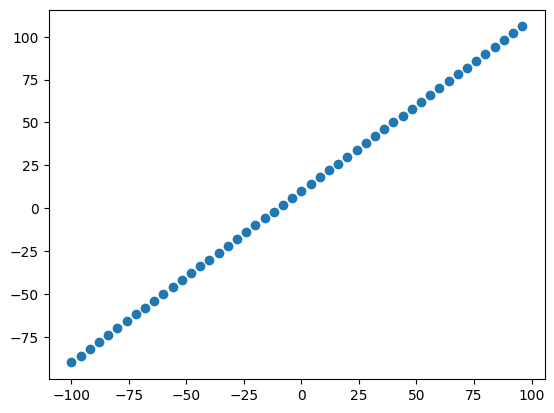

In [21]:
# Visualize the data
plt.scatter(X,Y)

### The 3 sets

* **Training Set**- The model learns from this data,which is typically 70-80% of the total data you have avaiable
*  **Validation Set**- The model gets tuned on this data,which is typically 10-15% of the data avaiable
* **Test Set**- The model gets evaluated on this data to test what is has learned ,thi sset is typically 10-15% of the total
data avaiable. 


In [22]:
# Check the length of how many samples we have
len(X)

50

In [23]:
# Split the data into train and test sets
X_train=X[:40] # First 40 are training sample(80% of the data)
Y_train=Y[:40] # First 40 are training sample(80% of the data)

X_test=X[40:] # Last 10 are training sample(20% of the  data)
Y_test=Y[40:] # Last 10 are training sample(20% of the  data)

len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

### Visualzing the data

Now we've got our data in training test sets....Let's visualize it again!

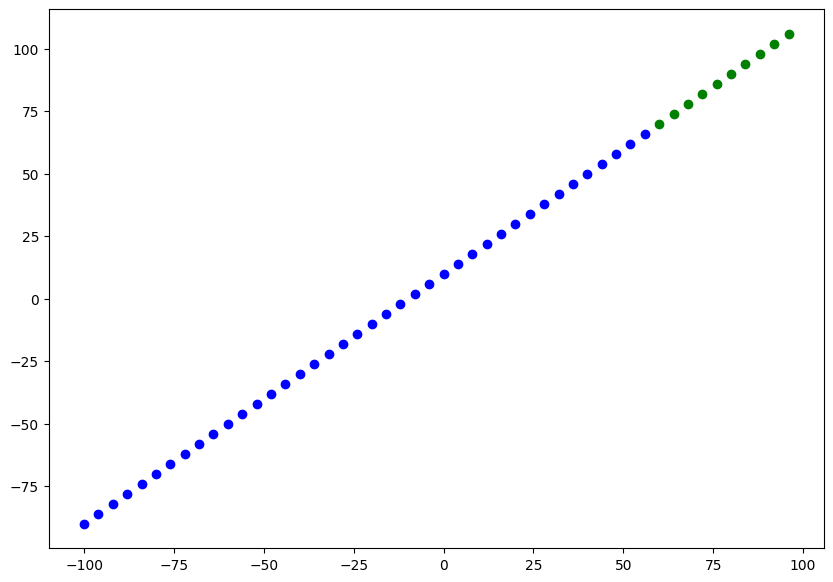

In [24]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train,Y_train,c='b',label="Training Data")
#Plot Test data in Green
plt.scatter(X_test,Y_test,c='g',label="Test Data")

In [25]:
# Let's have a look at how to bulid a neural network

# 1.Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 87.4901 - mae: 93.5440  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.5001 - mae: 58.3758 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.4568 - mae: 23.8591 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 10.9361 - mae: 11.8723  
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 9.5287 - mae: 8.7909  
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 9.9194 - mae: 10.2596   
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 11.0573 - mae: 12.0273  
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4283 - mae: 12.7073 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8078 - mae: 8.2031 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5297 - mae: 8.8652 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1076 - mae: 7.7969 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0427 - mae: 10.7910 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━

### Visualizing the model

In [26]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [27]:
# Let's create a model which bulids automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1.Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Let's fit our model to trainning data
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100


c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56.7895 - mae: 71.2429  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.7861 - mae: 27.5329 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.3901 - mae: 9.9725
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.2894 - mae: 13.7763 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3695 - mae: 18.0962 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9399 - mae: 10.1343
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4029 - mae: 11.4335 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9061 - mae: 12.7058 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.9164 - mae: 14.6619 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2776 - mae: 11.7212 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.7953 - mae: 12.8705 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.4344 - mae: 15.0737 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

In [28]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* **Total Params**-Total number of parameters in the model
* **Trainable Params**-These are the parameters (patterns) the model can update as it trains
* **Non-trainable params**-These parameters are'nt updated during training (this is typical when you bring in already learn patterns or parameteres from other models during **Transfer Learning**).

In [29]:
# Get the summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Visualizing our model's Prediction

To Visualize perdictions,it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` verus `y_pred` (ground truth verus your model's predictions)

In [31]:
# Make some predictions
Y_preds =model.predict(X_test)
Y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[46.04803 ],
       [48.978886],
       [51.909744],
       [54.84059 ],
       [57.771446],
       [60.7023  ],
       [63.633156],
       [66.56401 ],
       [69.494865],
       [72.42571 ]], dtype=float32)

In [32]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [33]:
# Let's Create a plotting function
def plot_predictions(train_data=X_train,
                     train_label=Y_train,
                     test_data=X_test,
                     test_label=Y_test,
                     predictions=Y_preds):
    """
    Plots trainning data,test data and compares predictions to ground truth labels
    """

    plt.figure(figsize=(10,7))
    # Plot the trainning data in blue
    plt.scatter(train_data,train_label,c="b",label="Training Data")
    #Plot testing data in green
    plt.scatter(test_data,test_label,c="g",label="Testing data")
    # Plot model's prediciton in red
    plt.scatter(test_data,predictions,c="r",label="Predictions")
    #Show the legend
    plt.legend();

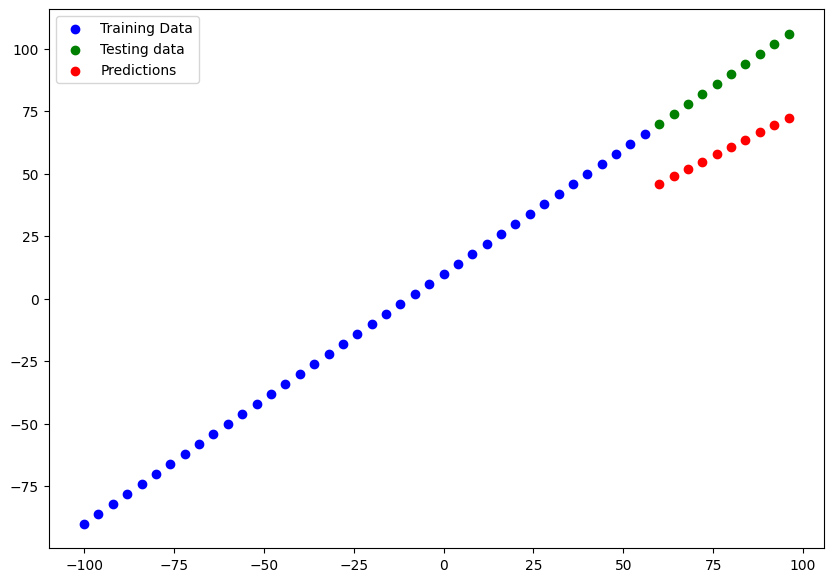

In [34]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem we are working on ,there will be different evaluation metrics to evaluate our model's performance

Two of the main metrics used for regression problems are:

* ***Mean absolute error (MAE)*** - the mean difference between each of the predictions.

* ***Mean squared error (MSE)*** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use `model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [35]:
# Evaluate the model on the test
model.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 28.7631 - mae: 28.7631


[28.763126373291016, 28.763126373291016]

In [36]:
#Calculate the mean absolute error
tf.keras.losses.mae(y_true=Y_test,
                    y_pred=Y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([23.95197 , 25.021114, 26.090256, 27.159409, 28.228554, 29.297699,
       30.366844, 31.43599 , 32.505135, 33.574287], dtype=float32)>

In [37]:
tf.constant(Y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[46.04803 ],
       [48.978886],
       [51.909744],
       [54.84059 ],
       [57.771446],
       [60.7023  ],
       [63.633156],
       [66.56401 ],
       [69.494865],
       [72.42571 ]], dtype=float32)>

In [38]:
Y_test# Here both the Y_preds and Y_test are not in same shape

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [39]:
tf.squeeze(Y_preds)# Now the extra 1 dimension is removed here

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([46.04803 , 48.978886, 51.909744, 54.84059 , 57.771446, 60.7023  ,
       63.633156, 66.56401 , 69.494865, 72.42571 ], dtype=float32)>

In [40]:
# Caluate the mean absolute error
mae=tf.metrics.mae(Y_test,tf.squeeze(Y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=28.763126>

In [41]:
# Calculate the mean sqaure error
tf.metrics.mse(Y_test,tf.squeeze(Y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=836.74774>

In [42]:
# Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mae(y_true=y_true,
                          y_pred=y_pred)
def mse(y_true,y_pred):
    return tf.metrics.mse(y_true=y_true,
                          y_pred=y_pred)

### Running experiments to improve our model

Let's do three modeling experiments
1. `model_1`:same as the original model ,1 layer trained for 100 epochs
2. `model_2`:2 layers,tarined for 100 epochs
3. `model_3`:2 layers,trained for 500 epochs
4. `model_4`:3 layers,trainde for 100 epochs

In [43]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3.Fit the model
model_1.fit(np.expand_dims(X_train,axis=-1),Y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.8620 - mae: 83.5822  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43.9441 - mae: 48.4522 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.3984 - mae: 15.7598 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.3138 - mae: 9.9753
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8674 - mae: 8.2974 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6085 - mae: 8.9845 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4833 - mae: 8.0049 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.1306 - mae: 9.6718
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4630 - mae: 7.9871 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1150 - mae: 9.6602
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 8.4426 - mae: 7.9692  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0995 - mae: 9.6486
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [44]:
model_1.evaluate(X_train,Y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6014 - mae: 6.0813 


[8.86817455291748, 6.587967872619629]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


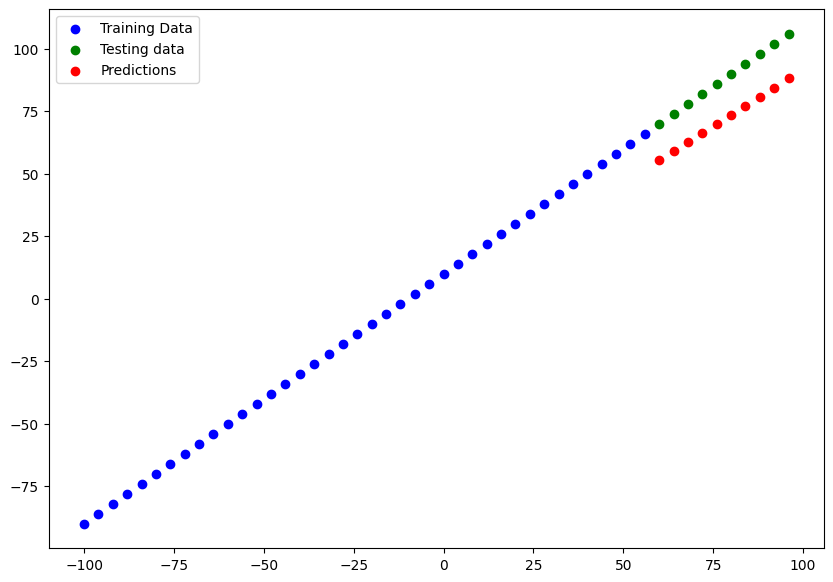

In [45]:
# Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [46]:
# Calculate model_1 evaluation metrics
mae_1=mae(Y_test,tf.squeeze(y_preds_1))
mse_1=mse(Y_test,tf.squeeze(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=16.144033>,
 <tf.Tensor: shape=(), dtype=float32, numpy=261.8601>)

**Bulid** `model_2`

* 2 dense layers,trained for 100 epochs

In [47]:
#Set the random seed
tf.random.set_seed(42)
# 1.Creating the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])
#Fitting the model
model_2.fit(np.expand_dims(X_train,axis=-1),Y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 42.1475 - mae: 43.4974
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.5335 - mae: 39.7235 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.4112 - mae: 36.4699 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.4895 - mae: 33.4330 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.6507 - mae: 30.5272 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 26.5179 - mae: 27.3384  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.0332 - mae: 23.7756 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.3364 - mae: 20.0077 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.3957 - mae: 15.9075 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 11.0478 - mae: 11.3999  
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 6.7208 - mae: 6.9300
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3541 - mae: 5.1100 
Epoch 13/100
2/2 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


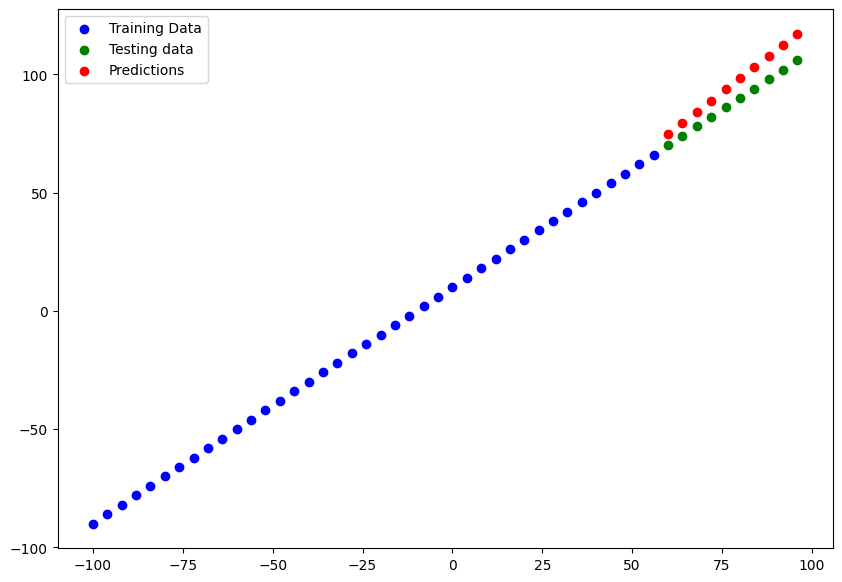

In [48]:
# Make plot and predictions for model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [49]:
mae_2=mae(Y_test,tf.squeeze(y_preds_2))
mse_2=mse(Y_test,tf.squeeze(y_preds_2))
mae_2,mse_2


(<tf.Tensor: shape=(), dtype=float32, numpy=7.981387>,
 <tf.Tensor: shape=(), dtype=float32, numpy=67.77159>)

In [50]:
# Set the random seed
tf.random.set_seed(42)

# 1.Creating the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2.Compiling the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_3.fit(np.expand_dims(X_train,axis=-1),Y_train,epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 39.7149 - mae: 41.0293
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.9496 - mae: 37.0915 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.5696 - mae: 33.6025 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.1530 - mae: 30.1160 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.2079 - mae: 26.1163 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5948 - mae: 21.4568 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.2824 - mae: 15.9587 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4867 - mae: 9.9431   
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5775 - mae: 8.5253 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9367 - mae: 7.1290 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6456 - mae: 5.7181 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3386 - mae: 7.2229 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


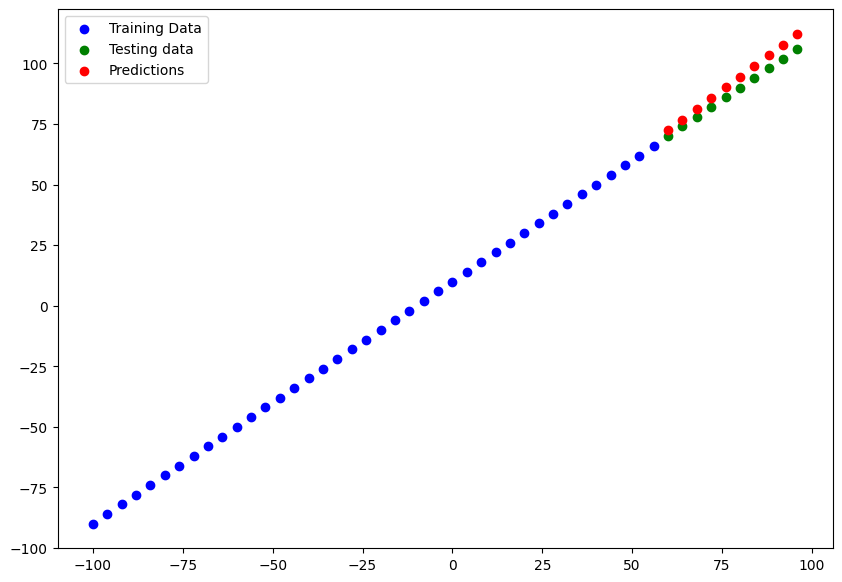

In [51]:
# Make a plot predictions of model_3
y_preds_3= model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [52]:
# Calculate the evaluate metrics
mae_3=mae(Y_test,tf.squeeze(y_preds_3))
mse_3=mse(Y_test,tf.squeeze(y_preds_3))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=4.3189926>,
 <tf.Tensor: shape=(), dtype=float32, numpy=20.138763>)

In [53]:
# Setting the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
# Fitting the model
model_4.fit(np.expand_dims(X_train,axis=-1),Y_train,epochs=354)

Epoch 1/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 39.9071 - mae: 41.2211
Epoch 2/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.4193 - mae: 37.5609 
Epoch 3/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 33.4102 - mae: 34.4637  
Epoch 4/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.2301 - mae: 31.2643 
Epoch 5/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.4785 - mae: 27.4850 
Epoch 6/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.1913 - mae: 23.1444 
Epoch 7/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.1731 - mae: 17.9648 
Epoch 8/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.2031 - mae: 13.4681 
Epoch 9/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7300 - mae: 15.0350 
Epoch 10/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.3531 - mae: 13.9005 
Epoch 11/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4016 - mae: 9.8119   
Epoch 12/354
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1805 - mae: 7.1444 
Epoch 13/354
2/2 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


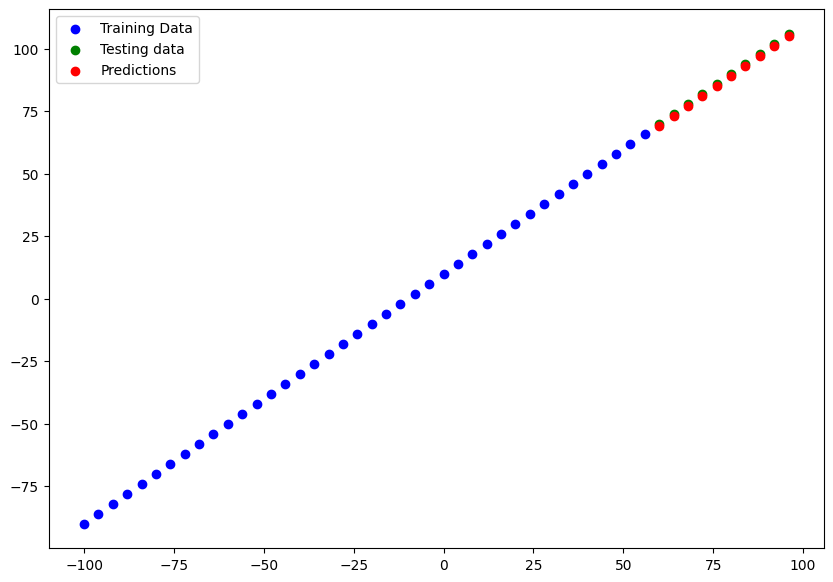

In [54]:
# Make the plot of the predeictions
Y_pred_4=model_4.predict(X_test)
plot_predictions(predictions=Y_pred_4)


In [55]:
mae_4=mae(Y_test,tf.squeeze(Y_pred_4))
mse_4=mse(Y_test,tf.squeeze(Y_pred_4))
mae_4,mse_4


(<tf.Tensor: shape=(), dtype=float32, numpy=0.80676043>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.65477324>)

In [56]:
Y_pred_4,Y_test

(array([[ 69.296295],
        [ 73.2724  ],
        [ 77.24851 ],
        [ 81.224625],
        [ 85.20072 ],
        [ 89.176834],
        [ 93.15294 ],
        [ 97.129135],
        [101.11909 ],
        [105.11185 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

**NOTE:** You want to make sure to start small experiments(small models) and make sure they work and then increase their scale when necessary.

### Comparing the reusults of our experimenets

We have run a few experiments.let's compare the results

In [57]:
# Let's compare our model's reults using a pandas DataFrame
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()],
               ["model_4",mae_4.numpy(),mse_4.numpy()]]
all_results=pd.DataFrame(model_results,columns=["model_1","mae","mse"])
all_results

,model_1,mae,mse
0,model_1,16.144033,261.860107
1,model_2,7.981387,67.771591
2,model_3,4.318993,20.138763
3,model_4,0.806760,0.654773


Looks like the `model_4` perfoemed the best

In [58]:
model_4.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,805 (358.62 KB)

 Trainable params: 30,601 (119.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,204 (239.08 KB)

**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

### Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments.

And when doing so,it can be tedious if you're running lots of experiments

Luckily,there are tools to help us!

**Resoruces**:

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving Our Models

Saving our models allows us to use them outside of Jupyter notebook(or whereever they were trained) such as in a web application or a mobile app

There are two main formats we can save our model's to:
1. The Saved Model Format
2. The HDF5 format

In [59]:
# Save model using the SavedModel Format
model_4.save("Linear_Regression_SaveModel_format")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `tf.saved_model.save()` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=Linear_Regression_SaveModel_format.

In [60]:
# Save model using HDF5 Format
model_4.save("Sample_HDF5.h5")


## *Loading in the saved model*

In [61]:
# Loading in the saved Model format
loaded_SavedModel_format=tf.keras.models.load_model("Linear_Regression_SaveModel_format")
loaded_SavedModel_format.summary()

ValueError: File format not supported: filepath=Linear_Regression_SaveModel_format. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(Linear_Regression_SaveModel_format, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [62]:
model_4.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,805 (358.62 KB)

 Trainable params: 30,601 (119.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,204 (239.08 KB)

In [63]:
# Comparing the model_4 predictions with the SavedModel format model predictions
model_4_preds=model_4.predict(X_test)
loaded_SavedModel_format_preds=loaded_SavedModel_format.predict(X_test)
model_4_preds==loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


NameError: name 'loaded_SavedModel_format' is not defined

In [64]:
model_4_preds,loaded_SavedModel_format_preds

NameError: name 'loaded_SavedModel_format_preds' is not defined

In [65]:
mae(y_true=Y_test,y_pred=model_4_preds)==mae(y_true=Y_test,y_pred=loaded_SavedModel_format_preds)

NameError: name 'loaded_SavedModel_format_preds' is not defined

In [66]:
model_4_preds.squeeze()==loaded_SavedModel_format_preds.squeeze()

NameError: name 'loaded_SavedModel_format_preds' is not defined

In [67]:
model_4_preds.shape

(10, 1)

In [68]:
loaded_SavedModel_format_preds.shape

NameError: name 'loaded_SavedModel_format_preds' is not defined

In [69]:
# Load in a mdoel using the .h5 fromat
loaded_HF5_model=tf.keras.models.load_model("Sample_HDF5.h5")

In [70]:
loaded_HF5_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,603 (119.55 KB)

 Trainable params: 30,601 (119.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [71]:
# Check to see if loaded .h5 model predictions match the model_4
loaded_HF5_model_preds=loaded_HF5_model.predict(X_test)
model_4_preds==loaded_HF5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [72]:
# Compare the mae of the model_4_preds and the loaded_hdf5_preds
mae(y_true=Y_test,y_pred=model_4_preds)==mae(y_true=Y_test,y_pred=loaded_HF5_model_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

### Larger Dataset

In [73]:
X_train,Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [74]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Read in the insurance dataset
insurance=pd.read_csv(r"C:\Users\vudut\Downloads\insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [77]:
#let's try one -hot encode our dataframe so that the columns are in the same datatype
insurance_one_hot=pd.get_dummies(insurance,dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [78]:
#Create the X and Y values (features and labels)
X=insurance_one_hot.drop("charges",axis=1)
Y=insurance_one_hot["charges"]

In [79]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [80]:
#View Y
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [81]:
#Creating training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [82]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [83]:
# Bulid a neural network(sort of like model_2 above)
tf.random.set_seed(42)

# 1.Create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fitting the model
insurance_model.fit(X_train,Y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 10041.5293 - mae: 10042.7812 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 7749.3076 - mae: 7750.9038
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 7979.2998 - mae: 7981.1509
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 7985.7900 - mae: 7987.7773
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 7647.2202 - mae: 7649.0166
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 7678.8701 - mae: 7680.7529
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 7318.2695 - mae: 7319.8066
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 7654.8755 - mae: 7656.7197
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 7489.9531 - mae: 7491.6880
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 7343.8691 - mae: 7344.6050
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 7853.4829 - mae: 7855.4321
Epoch 12/100
34/34 ━━━━━━━━

In [84]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6353.0181 - mae: 6321.6094 


[6342.306640625, 6185.26123046875]

In [85]:
Y_train.median(),Y_train.mean()

(9575.4421, 13346.089736364485)

In [86]:
# Set the random seed
tf.random.set_seed(42)

# 1.Creating the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.Compiling the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3.Fitting the model
insurance_model_2.fit(X_train,Y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 13296.2441 - mae: 13298.4141 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 13144.5791 - mae: 13146.8135
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 12845.8291 - mae: 12848.2002
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 12253.4199 - mae: 12256.0049
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 11228.9697 - mae: 11231.6094
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 9822.3047 - mae: 9824.7061 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 8402.2236 - mae: 8403.6514
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 7565.2163 - mae: 7565.6128
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 7414.6494 - mae: 7414.8452
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 7385.1719 - mae: 7385.3882
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 7363.0439 - mae: 7363.2769
Epoch 12/100
34/34

In [87]:
# Evaluate the model_2
insurance_model_2.evaluate(X_test,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4860.1089 - mae: 4833.6904 


[4831.57666015625, 4699.48388671875]

### As we know that the above model shows much error so we need to decrease that error doing the following

* Either by increasing the number of epochs
* By changing the optimizers 
* Or train the model for longer time

In [88]:
# Set the random seed 
tf.random.set_seed(42)

# 1.Creating the model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.Compiling the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fitting the model
history=insurance_model_3.fit(X_train,Y_train,epochs=200,verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - loss: 13278.1533 - mae: 13280.3184 
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 13136.6826 - mae: 13138.9131
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 12844.6777 - mae: 12847.0469
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 12250.7236 - mae: 12253.3135
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 11209.6162 - mae: 11212.2607
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 9787.5977 - mae: 9789.9951 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 8369.2666 - mae: 8370.6826
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 7546.0161 - mae: 7546.4121
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 7399.7095 - mae: 7399.9106
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 7371.1406 - mae: 7371.3628
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 7349.2109 - mae: 7349.4517
Epoch 12/200
34/34

In [89]:
# Evaluate the model_3
insurance_model_3.evaluate(X_test,Y_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 3477.8276 - mae: 3464.2866


[3467.39404296875, 3399.689208984375]

In [90]:
insurance_model.evaluate(X_test,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 6353.0181 - mae: 6321.6094


[6342.306640625, 6185.26123046875]

Text(0.5, 0, 'epochs')

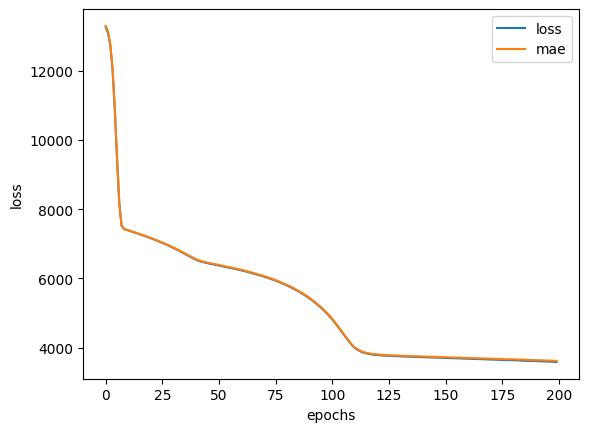

In [91]:
# Plot the history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question** How long should you train for?

It depends.Really... it depends on the promblem we are working withor on.However,many peoplw have asked this question before so Tensflow has a solution It's called the [Early Stopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) which is a tensorflow component you can add to your model to stop training once it stops improving a certain metric 

### Processing Data (Normalization and Standardization)

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [93]:
# Read in the insurance dataframe 
insurance=pd.read_csv(r"C:\Users\vudut\Downloads\insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow a few classes from the Scikit learn

In [94]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Creating a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # Turn all the values in these columns in between 1 and 0
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create  X and Y
X=insurance.drop("charges",axis=1)
Y=insurance["charges"]

# Bulid out train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform tarining and test data with nonrmalization(MinMaxScale) and OneHotEncoder
X_train_noraml=ct.transform(X_train)
X_test_normal=ct.transform(X_train)

In [95]:
# What does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [96]:
X_train_noraml

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [97]:
X_train.shape,X_train_noraml.shape

((1070, 6), (1070, 11))

Beautiful Our data has been normalised and one hot encoded.Now let's bulid a neural network model on it and see how it goes

In [98]:
# Bulid a neyral network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create our model
insurance_model_nml=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compiling our model
insurance_model_nml.compile(loss=tf.keras.losses.mae,
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=["mae"])

# 3.Fit the model onto our normalized data
insurance_model_nml.fit(X_train_noraml,Y_train,epochs=200,verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - loss: 13294.9844 - mae: 13297.0918 
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 13286.4961 - mae: 13288.6084
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 13266.0957 - mae: 13268.2188
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 13222.3350 - mae: 13224.4727
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 13143.6816 - mae: 13145.8398
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 13018.7646 - mae: 13020.9482
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 12837.1357 - mae: 12839.3496
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 12588.9873 - mae: 12591.2344
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 12264.7637 - mae: 12267.0498
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 11859.0928 - mae: 11861.4189
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 11383.0381 - mae: 11385.3408
Epoch 1

In [99]:
X_test_normal.shape

(1070, 11)

In [100]:
Y_test.shape

(268,)

In [101]:
# Evaluate our insurance model trained on normalised data
insurance_model_nml.evaluate(X_test_normal,Y_test)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1070
'y' sizes: 268


<Axes: ylabel='Frequency'>

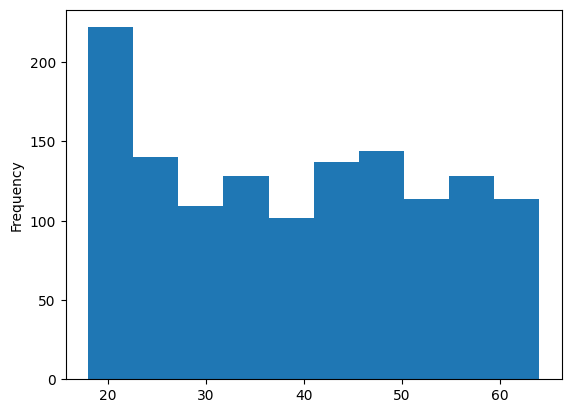

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

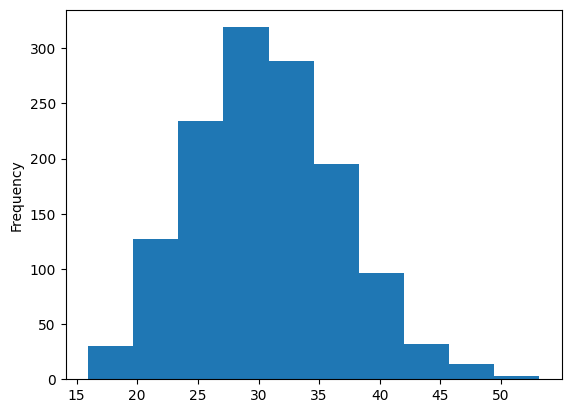

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64